# Import packages and data

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import numpy as np
from matplotlib import pyplot as plt
from functools import partial
from scipy.optimize import fmin
import torch
import os, glob
import plotly.express as px

from indentation.indentationset import IndentationSet
from indentation.processing.find_contact import findContact_minimum, findContact_blackMagic, findContact_blackMagic_CNN
from indentation.processing.signal import do_nothing, crop_afm_temp, crop_start, crop_end
from indentation.processing.calculate_parameters import parameter_youngs_modulus, parameter_defelection_sensitivity
from indentation.processing.plotting import plot_curve_parameters_bar, plot_instance_parameters_bar, plot_mean_force_curves
from indentation.ml.models import ConvClassifier_1, ConvClassifier_2

In [29]:
# paths = glob.glob(r"E:\Group\File_Exchange\Raoul_Paula\151124\air_calib3\*.txt")
# paths = glob.glob(r"E:\Group\File_Exchange\Raoul_Paula\glass_afm_041124_calib\*.txt")
# paths = glob.glob(r"E:\Group\File_Exchange\Raoul_Paula\2024_11_08\afm_pdms_35t1_liquid\*.txt")
# paths = glob.glob(r"E:\Group\File_Exchange\Raoul_Paula\2024_11_08\afm_glass_liquid_2\*.txt")
# paths = glob.glob(r"E:\Group\File_Exchange\Raoul_Paula\2024_11_08\afm_glass_liquid_1\*.txt")
# paths = glob.glob(r"E:\Group\File_Exchange\Raoul_Paula\2024_11_15\afm_rtv_liquid\*.txt")#RTV data
# paths = glob.glob(r"E:\Group\File_Exchange\Raoul_Paula\Immersed_afm_081124\*.txt") # on glass
# paths = glob.glob(r"E:\Group\File_Exchange\Paula_Havar\Pycharm project\txts\*.txt")
# paths = glob.glob(r"E:\Group\File_Exchange\Raoul_Paula\2024_11_29\afm_pdms35t1_ethanol_no2\*.txt")
# paths = glob.glob(r"E:\Group\File_Exchange\Raoul_Paula\2024_11_29\afm_pdms35t1_pbs_no5\*.txt")
# paths = glob.glob(r"E:\Group\File_Exchange\Raoul_Paula\2024_11_29\afm_pdms35t1_plasma_pbs_no3\*.txt")

# 49
paths = glob.glob(r"G:\File_Exchange\Raoul_Paula\2024_12_06\afm_colgel_glue1_pbs_500pN_10nN\*.txt")

# 50
#paths = glob.glob(r"G:\File_Exchange\Raoul_Paula\2024_12_06\afm_colgel_glue1_pbs_50pN_1nN_1ums\*.txt")

# 51
#paths = glob.glob(r"G:\File_Exchange\Raoul_Paula\2024_12_06\afm_colgel_glue1_pbs_250pn_1nN_2ums\*.txt")

# 52
#paths = glob.glob(r"G:\File_Exchange\Raoul_Paula\2024_12_06\afm_colgel_glue2_pbs_500pN_5nN_1ums\*.txt")



afm = IndentationSet(paths, exp_type="afm")

afm.plot_all(linestyle="", units="nano")
afm.plot_all_raw(linestyle="")

# plt.figure()
# plt.plot(-afm.data[0]["raw"]["z"], afm.data[0]["raw"]["force"], 'r*')
# plt.show()

fig = px.scatter(y=afm.data[4]["raw"]["force"])
fig.show()

plt.figure()
plt.plot(afm.data[4]["raw"]["z"], 'b*')
plt.show()

# Processing data

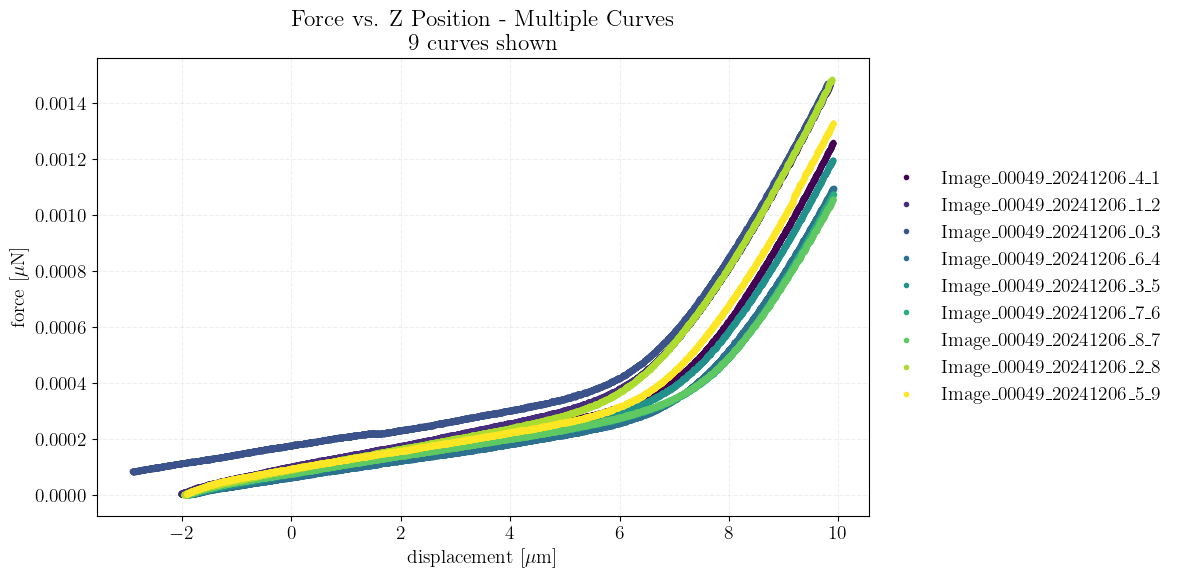

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Force vs. Z Position - Multiple Curves\n9 curves shown'}, xlabel='displacement [$\\mu$m]', ylabel='force [$\\mu$N]'>)

In [21]:
# processing_pl = [crop_afm_temp, findContact_minimum]
#processing_pl = [partial(crop_start, ix_start=5000), crop_afm_temp, findContact_blackMagic]
#processing_pl = [crop_afm_temp, findContact_blackMagic]
processing_pl = [crop_afm_temp]

afm.process_raw(processing_pl)
afm.plot_all(linestyle="")

In [26]:
processing_pl = [crop_afm_temp, findContact_blackMagic]

afm.process_raw(processing_pl)
afm.plot_all(linestyle="")

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Force vs. Z Position - Multiple Curves\n9 curves shown'}, xlabel='displacement [$\\mu$m]', ylabel='force [$\\mu$N]'>)

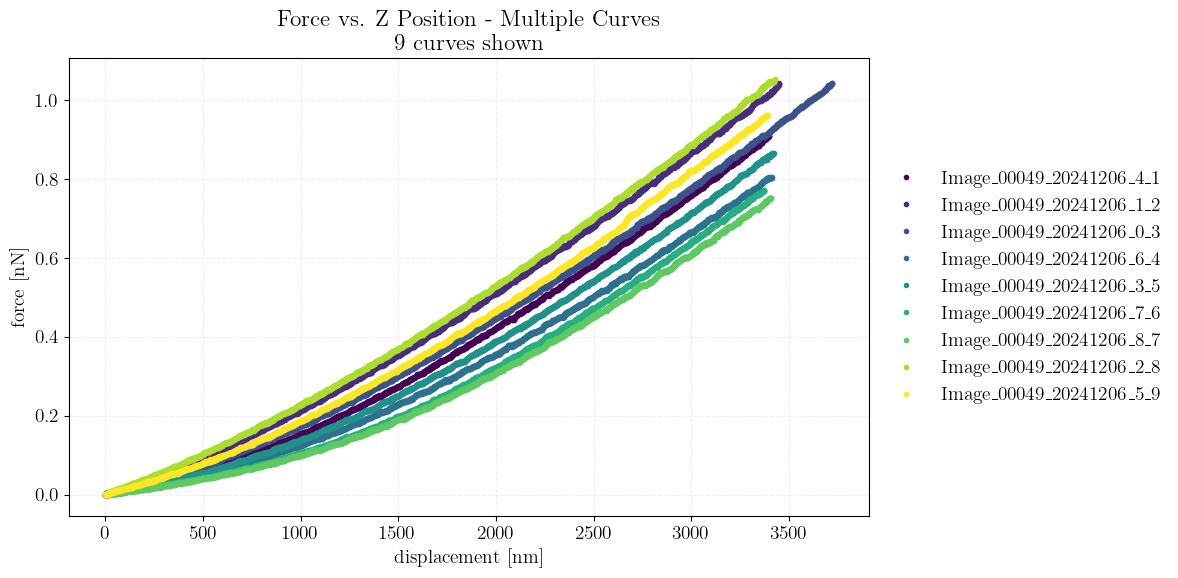

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Force vs. Z Position - Multiple Curves\n9 curves shown'}, xlabel='displacement [nm]', ylabel='force [nN]'>)

In [39]:
processing_pl = [crop_afm_temp, partial(crop_start, ix_start=7300), findContact_blackMagic]

afm.process_raw(processing_pl)
afm.plot_all(linestyle="", units="nano")

0.033574116459037955
0.07235223528851371
0.05801630333171435
0.024870134964116594
0.042481925041609817
0.017497403162121367
0.016658818494222318
0.06984183063010259
0.06186422166259519
Mean and std: 0.04412855433711488 0.02085391270420631


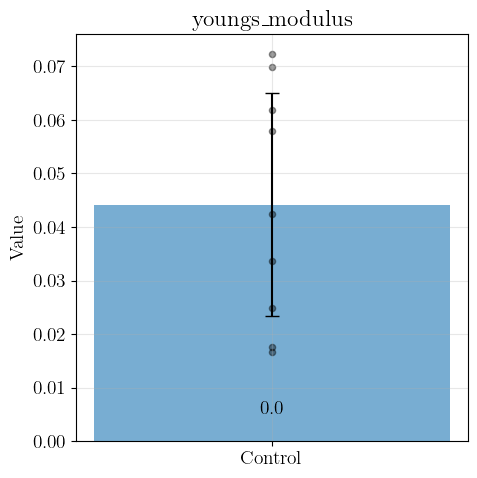

In [40]:
function_arguments = dict(radius=5, nu=0.5, cutoff=10, keyname="youngs_modulus")
afm.calculate_curve_parameter(function=parameter_youngs_modulus, **function_arguments)

plot_curve_parameters_bar(afm,
                         parameter_names=['youngs_modulus'],
                         labels=['Control'],
                         figsize=(5,5))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 54
0
13.116931915283203


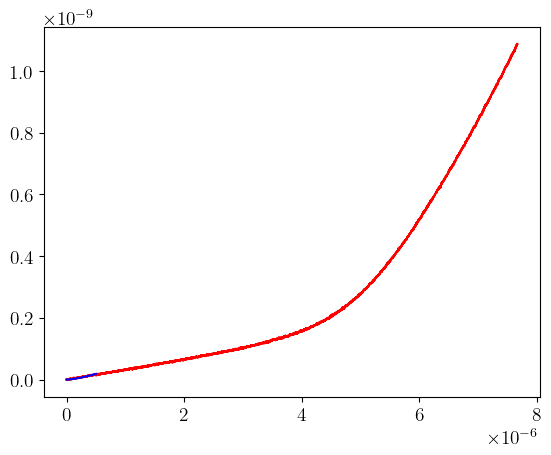

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 54
1
16.63980484008789


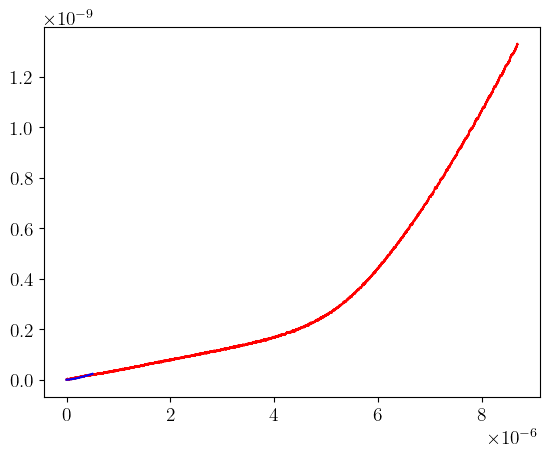

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 54
2
5.6705474853515625


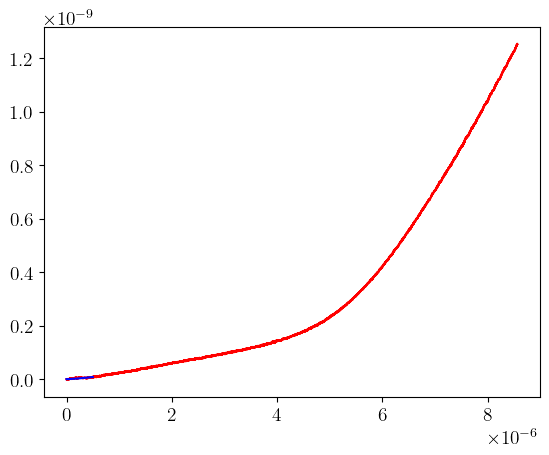

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 54
3
10.585880279541016


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 54
4
11.787128448486328


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 54
5
11.536979675292969


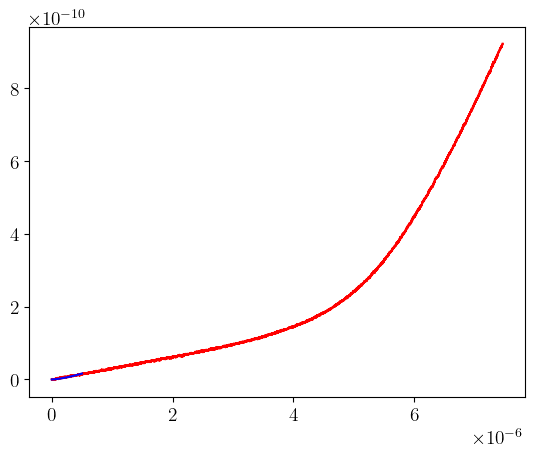

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 54
6
12.489604949951172


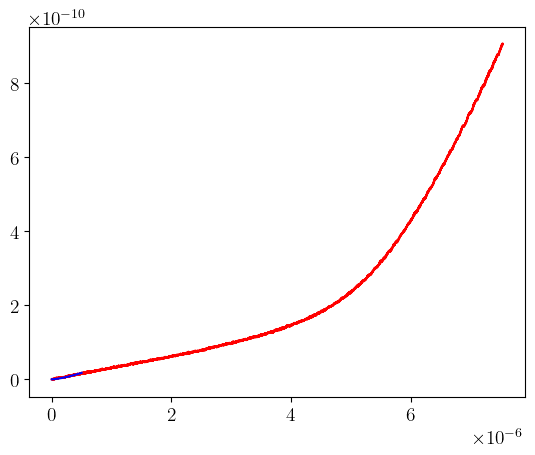

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 54
7
15.809345245361328


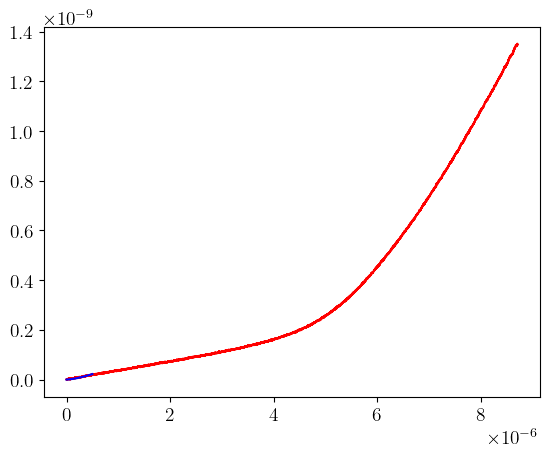

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 54
8
12.038707733154297


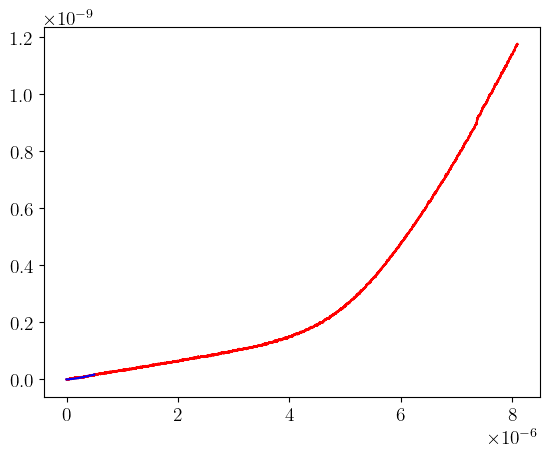

In [24]:
def hertzian(E, R, nu, z):
    hertz_F = 4.0 / 3.0 * E * np.sqrt(R) / (1 - nu*nu) * np.power(z, 3.0/2.0)
    
    return hertz_F

def sse(param, R, nu, F, z, cutoff):
    E = param
    ix = np.where(z > cutoff * R)[0][0]

    force = F[:ix]
    disp_z = z[:ix]
    
    hertz_F = hertzian(E, R, nu, disp_z)

    sse_value = np.sum((force-hertz_F)**2.0)

    return sse_value

for i in range(0, 9):
    initial_guess = 1e3
    R = 5 / 1e6
    nu = 0.5
    F = afm.data[i]["processed"]["force"] / 1e6
    z = -afm.data[i]["processed"]["z"] / 1e6
    cutoff = 0.10
    result = fmin(sse, initial_guess, args=(R, nu, F, z, cutoff))
    print(i)
    print(result[0])
    
    ix = np.where(z > cutoff * R)[0][0]
    hertz_fit = hertzian(result[0], R, nu, z[:ix])
    
    plt.figure()
    plt.plot(z, F, 'r-')
    plt.plot(z[:ix], hertz_fit, 'b-')
    plt.show()

C:\Users\paula\PythonCoding\indentation\indentation\processing\plotting.py:286: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


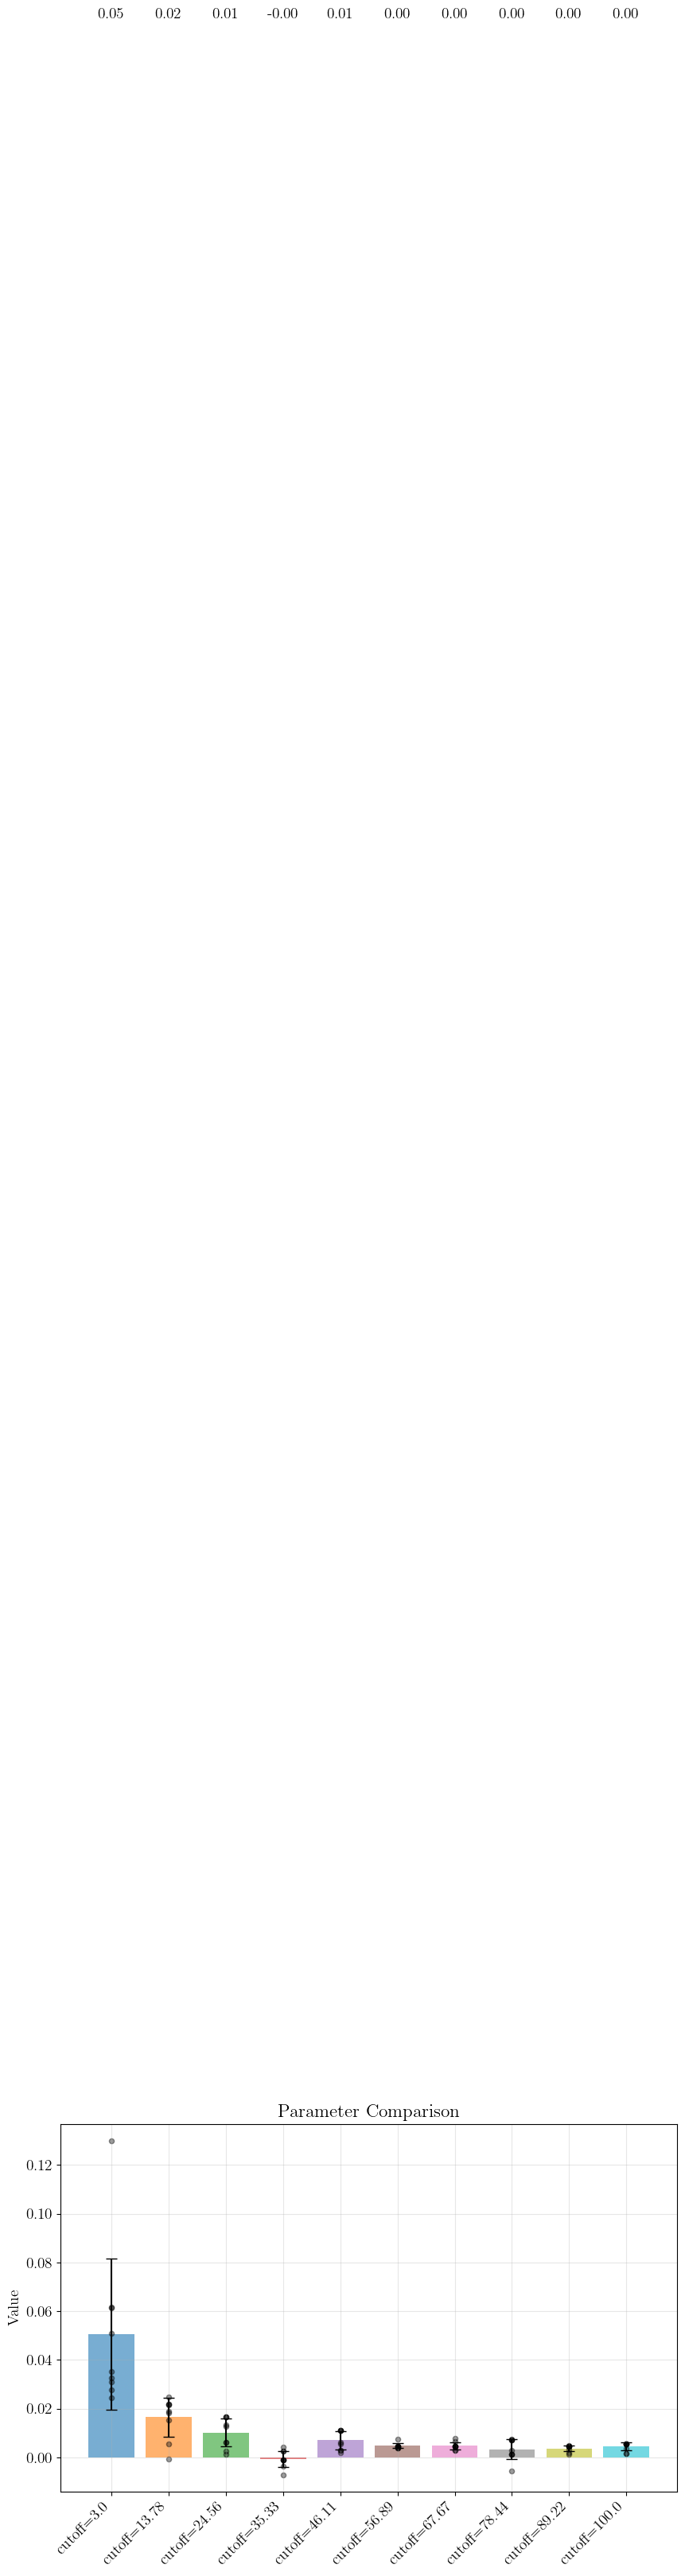

In [51]:
cutoffs = np.linspace(3, 100, 10)

for cutoff in cutoffs:
    function_arguments = dict(radius=5, nu=0.5, cutoff=cutoff, keyname="cutoff="+str(np.round(cutoff, 2)))
    afm.calculate_curve_parameter(function=parameter_youngs_modulus, **function_arguments)

plot_instance_parameters_bar(afm,
                         parameter_names=[*["cutoff="+str(np.round(cutoff, 2)) for cutoff in cutoffs]],
                         figsize=(10,6))

58.432449515586725
57.09483081384559
55.269405555368365
58.825003420531104
58.49225511176208
57.7134292374054
58.18200696329751
58.89549846045678
57.84910102597372
Mean and std: 57.86155334491414 1.0621187233312377


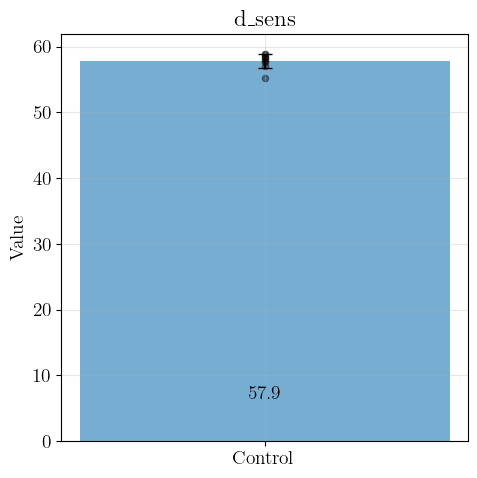

In [35]:
function_arguments = dict(keyname="d_sens")
fluidfm.calculate_curve_parameter(function=parameter_defelection_sensitivity)
plot_curve_parameters_bar(fluidfm,
                         parameter_names=["d_sens"],
                         labels=['Control'],
                         figsize=(5,5))